### Student Information
Name: SUFAL KUMAR CHHABRA   

Student ID: 4B317072

GitHub ID: Capacitator

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

Removed 23 duplicate rows


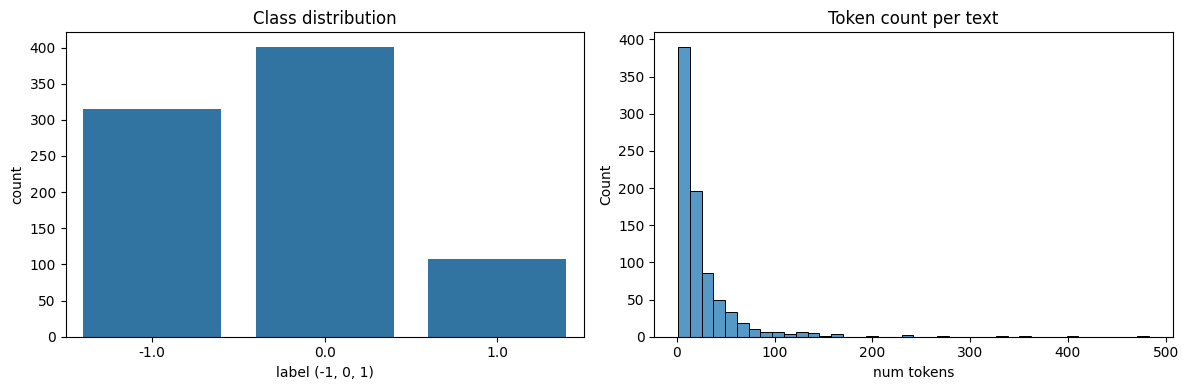

TDM shape: (824, 861)
Top 20 tokens: [('just', np.int64(95)), ('trump', np.int64(92)), ('like', np.int64(83)), ('market', np.int64(82)), ('china', np.int64(72)), ('think', np.int64(52)), ('people', np.int64(51)), ('going', np.int64(50)), ('money', np.int64(46)), ('good', np.int64(46)), ('tariffs', np.int64(39)), ('make', np.int64(36)), ('time', np.int64(36)), ('want', np.int64(35)), ('don', np.int64(34)), ('stock', np.int64(34)), ('doing', np.int64(32)), ('right', np.int64(29)), ('company', np.int64(29)), ('silver', np.int64(29))]
Baseline (Count NB) accuracy: 0.5878787878787879
              precision    recall  f1-score   support

        -1.0      0.574     0.619     0.595        63
         0.0      0.624     0.662     0.642        80
         1.0      0.417     0.227     0.294        22

    accuracy                          0.588       165
   macro avg      0.538     0.503     0.511       165
weighted avg      0.577     0.588     0.578       165



In [3]:
# Imports and dataset loading for Phase 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score

# Load dataset (local path preferred); fallback to raw GitHub link if needed
csv_path = 'newdataset/Reddit-stock-sentiment.csv'
try:
    df = pd.read_csv(csv_path)
except FileNotFoundError:
    df = pd.read_csv('https://raw.githubusercontent.com/leoson-wu/DM2025-Lab1-Exercise/main/newdataset/Reddit-stock-sentiment.csv')

# Keep only necessary columns
needed_cols = [c for c in ['text', 'label'] if c in df.columns]
df = df[needed_cols].copy()

# Basic cleaning: drop NA, strip whitespace
df['text'] = df['text'].astype(str).str.strip()
df = df.dropna(subset=['text', 'label']).reset_index(drop=True)

# Ensure label is categorical or numeric in {-1, 0, 1}
# If label column is string, coerce to numeric where possible
try:
    df['label'] = pd.to_numeric(df['label'])
except Exception:
    # Map common strings to numeric if present
    mapping = {"negative": -1, "neutral": 0, "positive": 1}
    df['label'] = df['label'].map(mapping)

# Remove duplicates
before = len(df)
df = df.drop_duplicates(subset=['text']).reset_index(drop=True)
after = len(df)
print(f'Removed {before - after} duplicate rows')

# Quick EDA
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x='label', data=df, ax=ax[0])
ax[0].set_title('Class distribution')
ax[0].set_xlabel('label (-1, 0, 1)')
ax[0].set_ylabel('count')

text_lengths = df['text'].str.split().map(len)
sns.histplot(text_lengths, bins=40, ax=ax[1])
ax[1].set_title('Token count per text')
ax[1].set_xlabel('num tokens')
plt.tight_layout()
plt.show()

# Build term-document matrix using CountVectorizer
vectorizer = CountVectorizer(lowercase=True, stop_words='english', min_df=3)
X_counts = vectorizer.fit_transform(df['text'])
print('TDM shape:', X_counts.shape)

# Show top tokens overall
sum_counts = np.asarray(X_counts.sum(axis=0)).ravel()
vocab = np.array(vectorizer.get_feature_names_out())
top_idx = sum_counts.argsort()[::-1][:20]
print('Top 20 tokens:', list(zip(vocab[top_idx], sum_counts[top_idx])))

# Simple baseline: Count features + Naive Bayes (done more fully in Phase 2)
X_train, X_test, y_train, y_test = train_test_split(X_counts, df['label'], test_size=0.2, random_state=42, stratify=df['label'])
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print('Baseline (Count NB) accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))


# Phase 2

Count NB accuracy: 0.5878787878787879
              precision    recall  f1-score   support

        -1.0      0.574     0.619     0.595        63
         0.0      0.624     0.662     0.642        80
         1.0      0.417     0.227     0.294        22

    accuracy                          0.588       165
   macro avg      0.538     0.503     0.511       165
weighted avg      0.577     0.588     0.578       165

TF-IDF ComplementNB accuracy: 0.5515151515151515
              precision    recall  f1-score   support

        -1.0      0.556     0.635     0.593        63
         0.0      0.597     0.537     0.566        80
         1.0      0.381     0.364     0.372        22

    accuracy                          0.552       165
   macro avg      0.511     0.512     0.510       165
weighted avg      0.552     0.552     0.550       165

Train class dist: Counter({0.0: 321, -1.0: 252, 1.0: 86})
Test class dist: Counter({0.0: 80, -1.0: 63, 1.0: 22})


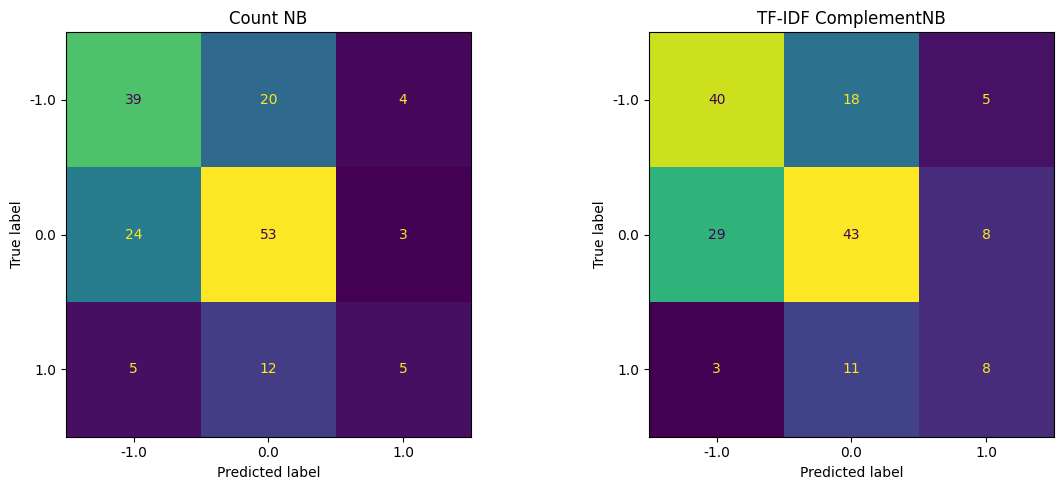

In [4]:
# Phase 2: TF-IDF and Naive Bayes classifiers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, accuracy_score

# Reuse df if present; otherwise reload
try:
    df
except NameError:
    csv_path = 'newdataset/Reddit-stock-sentiment.csv'
    try:
        df = pd.read_csv(csv_path)
    except FileNotFoundError:
        df = pd.read_csv('https://raw.githubusercontent.com/leoson-wu/DM2025-Lab1-Exercise/main/newdataset/Reddit-stock-sentiment.csv')
    needed_cols = [c for c in ['text', 'label'] if c in df.columns]
    df = df[needed_cols].dropna().reset_index(drop=True)
    try:
        df['label'] = pd.to_numeric(df['label'])
    except Exception:
        mapping = {"negative": -1, "neutral": 0, "positive": 1}
        df['label'] = df['label'].map(mapping)

# Count features
cv = CountVectorizer(lowercase=True, stop_words='english', min_df=3)
X_counts = cv.fit_transform(df['text'])

# TF-IDF features
# For imbalanced classes and long texts, use sublinear_tf; include bigrams for richer context
tfidf = TfidfVectorizer(lowercase=True, stop_words='english', min_df=3, ngram_range=(1,2), sublinear_tf=True)
X_tfidf = tfidf.fit_transform(df['text'])

# Train/test split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_counts, df['label'], test_size=0.2, random_state=42, stratify=df['label'])
Xt_train, Xt_test, yt_train, yt_test = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=42, stratify=df['label'])

# Naive Bayes on Count
nb_count = MultinomialNB()
nb_count.fit(Xc_train, yc_train)
yc_pred = nb_count.predict(Xc_test)
print('Count NB accuracy:', accuracy_score(yc_test, yc_pred))
print(classification_report(yc_test, yc_pred, digits=3))

# Naive Bayes on TF-IDF
# ComplementNB generally performs better with imbalanced text classification
nb_tfidf = ComplementNB()
nb_tfidf.fit(Xt_train, yt_train)
yt_pred = nb_tfidf.predict(Xt_test)
print('TF-IDF ComplementNB accuracy:', accuracy_score(yt_test, yt_pred))
print(classification_report(yt_test, yt_pred, digits=3))

# Brief comparison output
from collections import Counter
print('Train class dist:', Counter(yc_train))
print('Test class dist:', Counter(yc_test))

# Optional: simple confusion matrices
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(yc_test, yc_pred, ax=axes[0], colorbar=False)
axes[0].set_title('Count NB')
ConfusionMatrixDisplay.from_predictions(yt_test, yt_pred, ax=axes[1], colorbar=False)
axes[1].set_title('TF-IDF ComplementNB')
plt.tight_layout(); plt.show()